In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [152]:
path = r'C:\Users\gagan\Desktop\Mission Robosoft\Machine Learning-A-Z\Machine Learning A-Z (Codes and Datasets)\Part 3 - Classification\Section 14 - Logistic Regression\Python\Social_Network_Ads.csv'
df = pd.read_csv(path)

In [153]:
df.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [154]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [155]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [156]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [157]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)
model.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [158]:
y_pred = model.predict(x_test)

In [159]:
model.predict(scaler.transform([[30,87000]]))

array([0], dtype=int64)

In [160]:
model.predict_proba(scaler.transform([[30,87000]]))

array([[0.88725351, 0.11274649]])

In [161]:
print(np.concatenate((y_pred.reshape(len(y_test), 1), y_test.reshape(len(y_pred), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


In [162]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
cm

array([[65,  8],
       [ 3, 24]], dtype=int64)

In [163]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.89

In [164]:
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1

In [165]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
xy = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(xy).reshape(xx.shape)

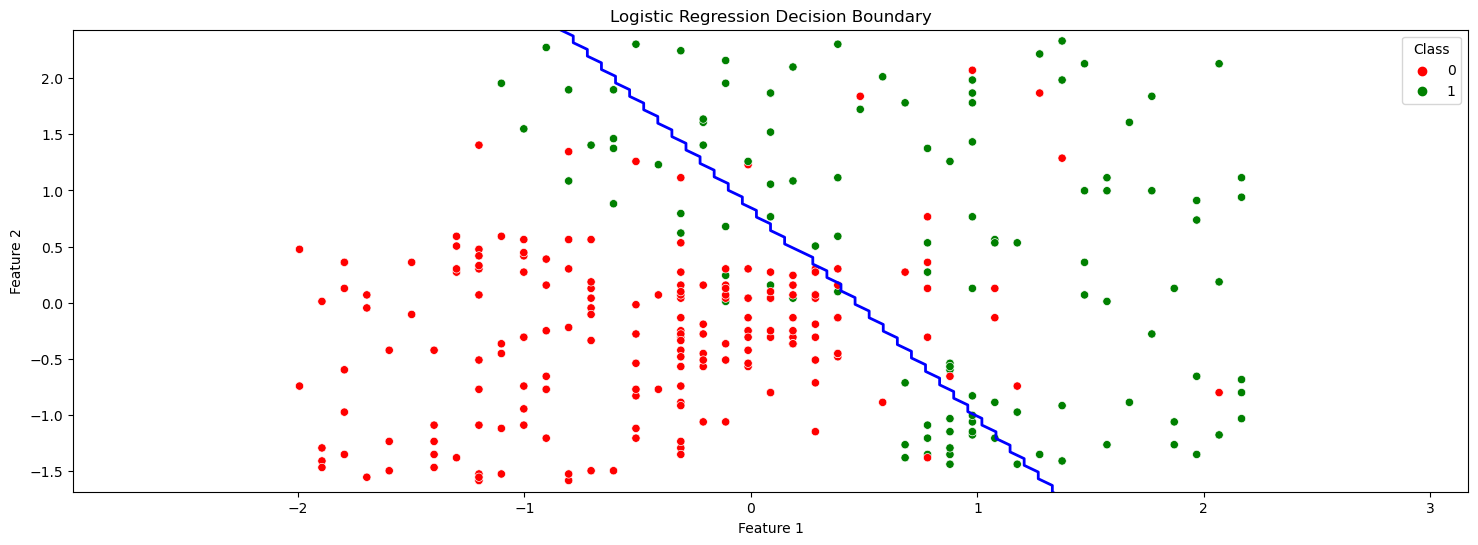

In [166]:
plt.figure(figsize=(18, 6))
sns.scatterplot(x=x_train[:, 0], y=x_train[:, 1], hue=y_train, palette=['red', 'green'])
plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors='blue')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary")
plt.legend(title="Class")
plt.ylim((min(x_test[:, 1]) - 0.1, max(x_test[:, 1]) + 0.1))
plt.show()  

In [167]:
x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1

In [168]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
xy = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(xy).reshape(xx.shape)

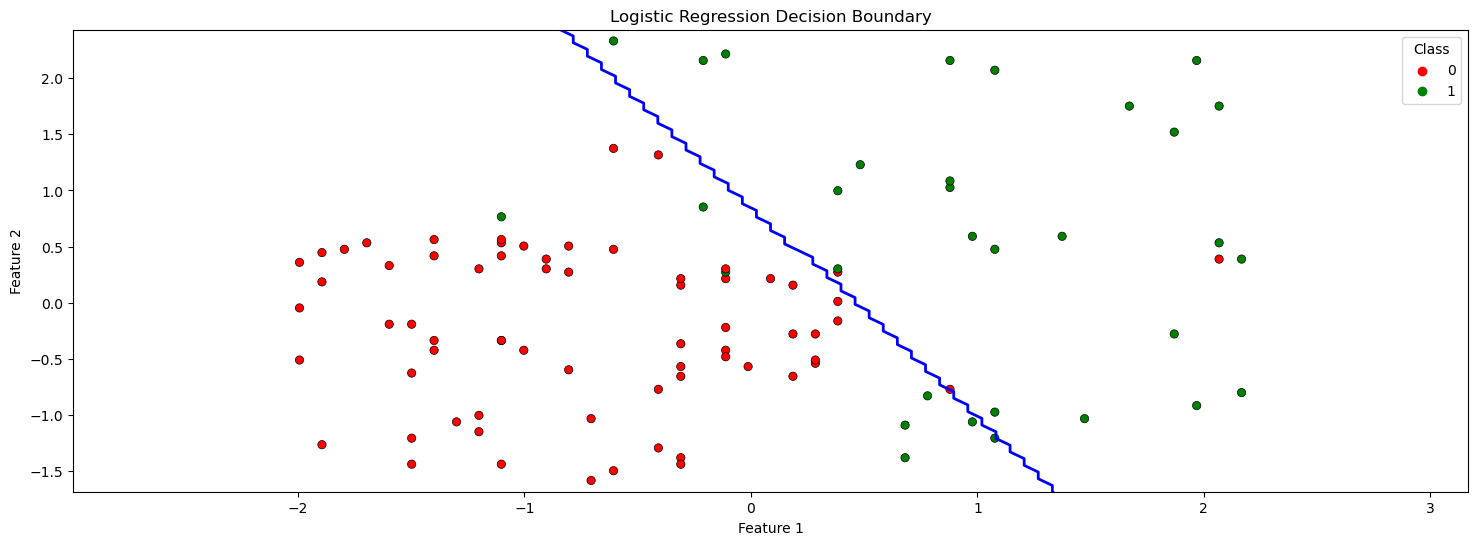

In [169]:
plt.figure(figsize=(18, 6))
sns.scatterplot(x=x_test[:, 0], y=x_test[:, 1], hue=y_test, palette=['red', 'green'], edgecolor='black')
plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors='blue')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.ylim((min(x_test[:, 1]) - 0.1, max(x_test[:, 1]) + 0.1))
plt.title("Logistic Regression Decision Boundary")
plt.legend(title="Class")
plt.show()